In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
from function_notebook_1 import *

In [3]:
df = pd.read_csv('data/regularseason16.csv').drop('Unnamed: 0', axis = 1)
df.head()

,w_loc,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,...,L_Opp_TSpct,L_Opp_FTr,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win
0,N,1169.0,71.0,26.0,55.0,4.0,12.0,15.0,31.0,13.0,...,0.515502,0.410714,0.358610,40.0,0.933333,0.608696,0.025357,0.070175,0.183094,False
1,A,1176.0,58.0,22.0,42.0,7.0,17.0,7.0,10.0,3.0,...,0.428901,0.467742,0.422303,44.0,0.789474,0.789474,0.085084,0.046875,0.200475,True
2,H,1296.0,83.0,24.0,54.0,11.0,24.0,24.0,34.0,11.0,...,0.558984,0.438596,0.348457,34.0,1.500000,0.625000,0.085444,0.053571,0.126783,True
3,H,1454.0,71.0,21.0,49.0,9.0,27.0,20.0,21.0,12.0,...,0.431359,0.296875,0.438206,51.0,0.761905,0.800000,0.063308,0.064516,0.223345,True
4,H,1153.0,97.0,36.0,59.0,6.0,14.0,19.0,27.0,11.0,...,0.610687,0.192982,0.417838,29.0,1.785714,0.862069,0.050283,0.016667,0.183667,True


In [4]:
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)
df

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,w_loc_H,w_loc_N
0,1169.0,71.000000,26.000000,55.000000,4.000000,12.000000,15.000000,31.000000,13.000000,23.000000,...,0.358610,40.000000,0.933333,0.608696,0.025357,0.070175,0.183094,False,0,1
1,1176.0,58.000000,22.000000,42.000000,7.000000,17.000000,7.000000,10.000000,3.000000,16.000000,...,0.422303,44.000000,0.789474,0.789474,0.085084,0.046875,0.200475,True,0,0
2,1296.0,83.000000,24.000000,54.000000,11.000000,24.000000,24.000000,34.000000,11.000000,28.000000,...,0.348457,34.000000,1.500000,0.625000,0.085444,0.053571,0.126783,True,1,0
3,1454.0,71.000000,21.000000,49.000000,9.000000,27.000000,20.000000,21.000000,12.000000,19.000000,...,0.438206,51.000000,0.761905,0.800000,0.063308,0.064516,0.223345,True,1,0
4,1153.0,97.000000,36.000000,59.000000,6.000000,14.000000,19.000000,27.000000,11.000000,32.000000,...,0.417838,29.000000,1.785714,0.862069,0.050283,0.016667,0.183667,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,1114.0,70.000000,25.000000,54.866667,7.400000,19.033333,12.600000,17.200000,8.700000,24.100000,...,0.328170,35.366667,1.038348,0.480218,0.066300,0.053899,0.140778,True,0,1
5159,1163.0,73.454545,26.606061,57.909091,7.000000,19.272727,13.242424,16.878788,9.666667,26.878788,...,0.269938,38.424242,0.886752,0.516812,0.078556,0.076886,0.164423,True,0,1
5160,1246.0,79.606061,28.575758,59.727273,6.848485,18.575758,15.606061,22.818182,13.060606,25.818182,...,0.342455,35.030303,0.898947,0.565563,0.060681,0.057436,0.180406,True,0,1
5161,1277.0,80.181818,28.909091,59.515152,9.151515,21.030303,13.212121,18.151515,12.333333,29.575758,...,0.290751,29.969697,1.264516,0.509753,0.076715,0.049870,0.121944,True,0,1


In [5]:
#train_test_split
X = df.drop('fav_win',axis=1)
y = df['fav_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4130, 108), (1033, 108))

In [6]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [8]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: newton-cg
Mean Cross-Val Score: 0.859322033898305
Train Mean Accuracy: 0.8680387409200968
Test Mean Accuracy: 0.8489835430784124
Recall Score: 0.922882427307206
Precision Score: 0.8848484848484849
F1 Score: 0.9034653465346536


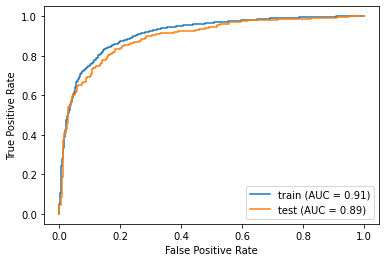

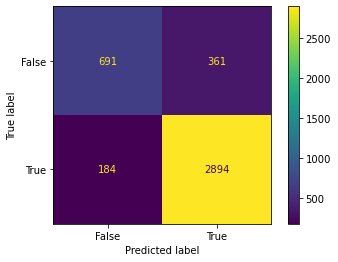

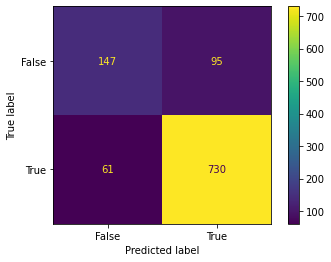

In [9]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

Number of Neighbors: 5
Metric: minkowski
Weights: distance
Mean Cross-Val Score: 0.8336561743341404
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8422071636011617
Recall Score: 0.943109987357775
Precision Score: 0.8634259259259259
F1 score: 0.901510574018127


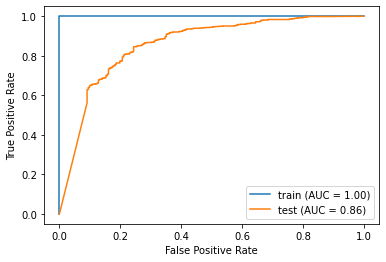

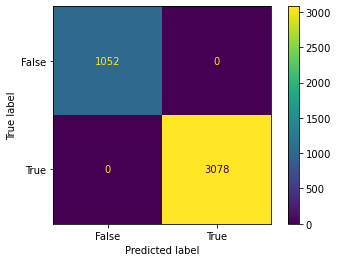

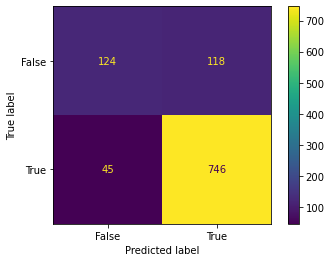

In [10]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [11]:
dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [12]:
X_train_best_dtree=X_train[dtree_feats]
X_test_best_dtree=X_test[dtree_feats]

Max Depth: 10
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.7719128329297822
Train Mean Accuracy: 0.9469733656174334
Test Mean Accuracy: 0.7899322362052275
Recall Score: 0.8748419721871049
Precision Score: 0.854320987654321
F1 score: 0.8644597126795752


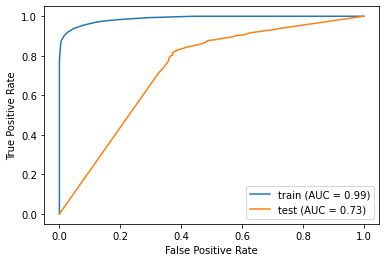

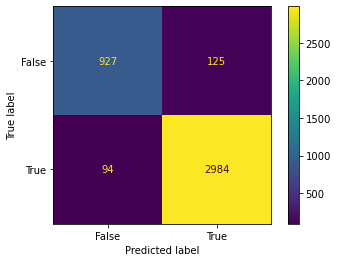

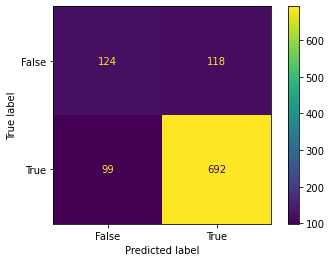

In [13]:
dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [14]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 90
Criterion: entropy
Mean Cross-Val Score: 0.8566585956416464
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8654404646660213
Recall Score: 0.9721871049304678
Precision Score: 0.8679458239277652
F1 score: 0.9171138938580798


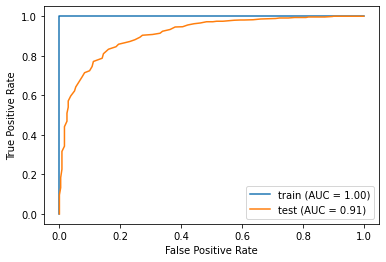

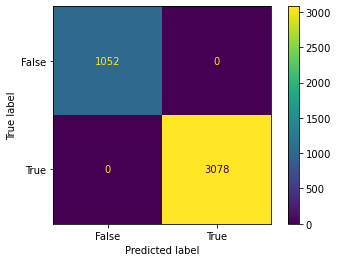

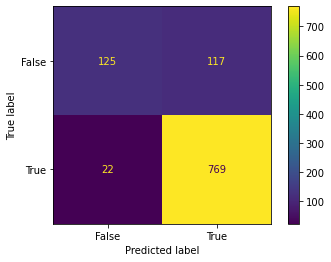

In [15]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 1
# of Base Estimators: 10
Mean Cross-Val Score: 0.7462469733656174
Train Mean Accuracy Score: 0.7452784503631962
Test Mean Accuracy Score: 0.7657308809293321
Recall Score: 1.0
Precision Score: 0.7657308809293321
F1 score: 0.8673245614035088


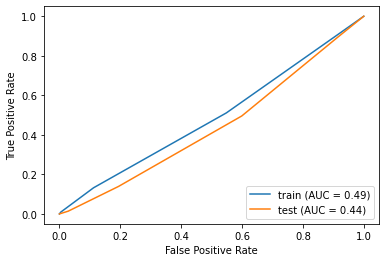

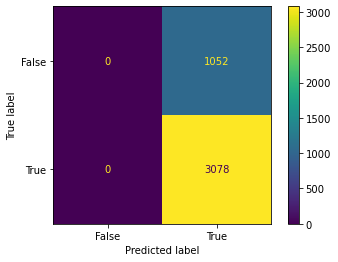

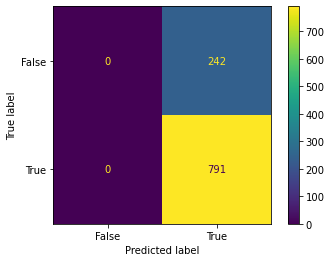

In [16]:
bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.1
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 500
Mean Cross-Val Score: 0.8755447941888621
Train Mean Accuracy Score: 1.0
Test Mean Accuracy Score: 0.872216844143272
Recall Score: 0.9380530973451328
Precision Score: 0.8993939393939394
F1 score: 0.9183168316831682


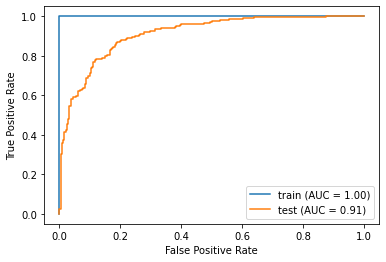

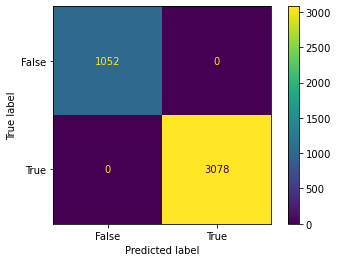

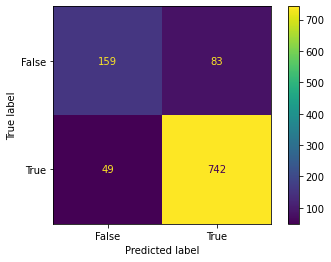

In [17]:
xgboost(X_train, X_test, y_train, y_test, cv=5)